In [1]:
import pandas as pd
import os
import numpy as np
from operator import itemgetter
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in relevant files
# read in variance files, they are dicts that have been pickled
with open("/cellar/users/zkoch/cs_clock_proj/blueprint_data/processed_data/raw_data_var_above_.1_flattened_partitioned/selected_features/highest_variance_dict.pkl", 'rb') as top_variance_f: 
    top_variance_dict = pickle.load(top_variance_f)
with open("/cellar/users/zkoch/cs_clock_proj/blueprint_data/processed_data/raw_data_var_above_.1_flattened_partitioned/selected_features/all_variance_dict.pkl", 'rb') as all_variance_f: 
    all_variance_dict = pickle.load(all_variance_f)
    all_variance_dict = dict(sorted(all_variance_dict.items(), key = itemgetter(1), reverse = True)[:9061488])
top_variance_dict = dict(sorted(all_variance_dict.items(), key = itemgetter(1), reverse = True)[0:181230])

In [3]:
print(len(top_variance_dict), len(all_variance_dict))

181230 9061488


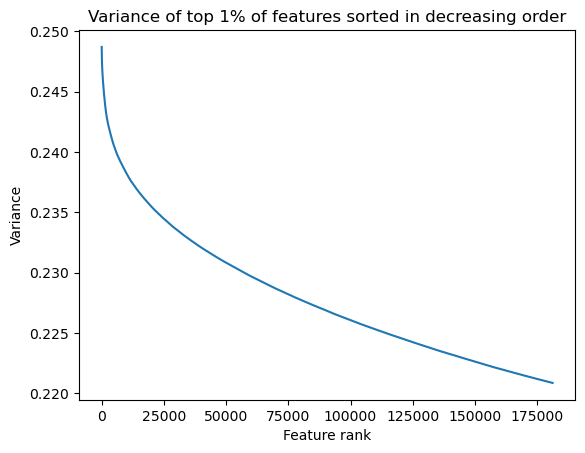

In [29]:
# plot waterfall plot with X axis: features sorted in descending order of variance, Y axis: variance 
# for top 1%
sns.lineplot(x = [i for i in range(0,len(top_variance_dict))], y = top_variance_dict.values()).set(title='Variance of top 1% of features sorted in decreasing order',xlabel = "Feature rank", ylabel = "Variance")
plt.show()

In [30]:
states = []
vars = []
counts = []
for key in all_variance_dict:
    s = key.split('_')[-1].split('E')[-1]
    states.append(s)
    vars.append(all_variance_dict[key])
state_var_df = pd.DataFrame(list(zip(states, vars)), columns = ['state','variance'])
state_var_df = state_var_df.sort_values(by= ['state', 'variance'], ascending=False)

In [33]:
print(len(state_var_df)/12)
state_var_df


755124.0


,state,variance
563,9,0.245732
921,9,0.244783
1001,9,0.244645
1177,9,0.244344
1267,9,0.244158
...,...,...
9061068,1,0.100005
9061153,1,0.100004
9061198,1,0.100003
9061275,1,0.100002


In [34]:
x_vec = []
for i in range(12):
    for j in range(int(len(state_var_df)/12)):
        x_vec.append(j)
state_var_df['x'] = x_vec

In [ ]:
ax1 = sns.lineplot(data=state_var_df, x='x', y='variance',hue='state').set(title='Variance of all features with variance>.1 sorted in decreasing order',xlabel = "Feature rank", ylabel = "Variance")
sns.color_palette('bright')
plt.show()

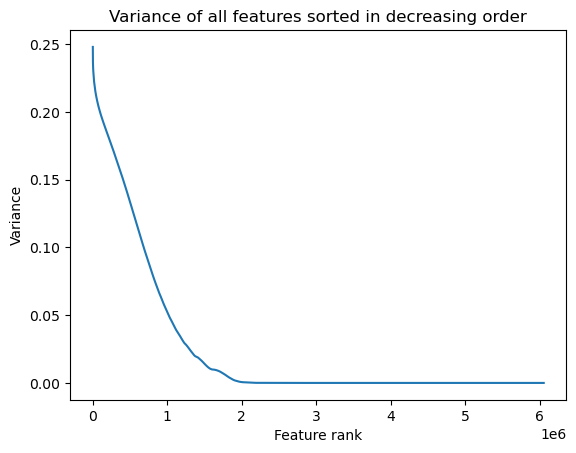

In [20]:
# for all
sns.lineplot(x = [i for i in range(0,len(all_variance_dict)], y = all_variance_dict.values()).set(title='Variance of all features with variance>.1 sorted in decreasing order',xlabel = "Feature rank", ylabel = "Variance")
plt.show()

In [10]:
# state distr for top 1% variances
distr = [i.split('_')[-1].split('E')[-1] for i in top_variance_dict.keys()]

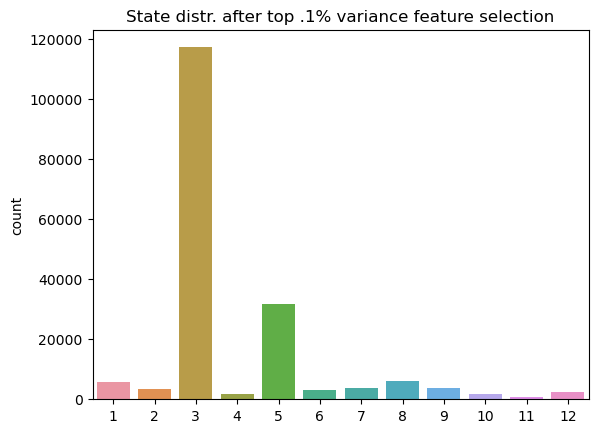

In [11]:
ord = [str(i) for i in range(1, 13)]
sns.countplot(x = distr, order = ord).set(title='State distr. after top .1% variance feature selection')
plt.show()

In [5]:
# state distr for features used in model
d = pd.read_csv("/cellar/users/zkoch/cs_clock_proj/blueprint_data/processed_data/raw_data_var_above_.1_flattened_partitioned/trained_clock/log_coef1.tsv", sep = '\t')

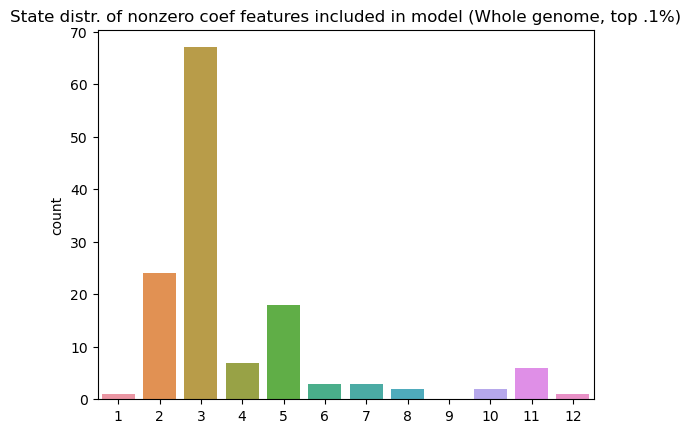

In [7]:
non_zero = d[d['0'] != 0]
feat = non_zero['Unnamed: 0'].tolist()
stat = [i.split('_')[-1].split('E')[-1] for i in feat]
ord = [str(i) for i in range(1, 13)]
sns.countplot(x = stat, order = ord).set(title='State distr. of nonzero coef features included in model (Whole genome, top .1%)')
plt.show()

In [97]:
non_zero.sort_values(by="Unnamed: 0")

,Unnamed: 0,0
1968,chr10_123097_E3,0.085774
2566,chr10_123098_E3,0.063171
2363,chr10_123099_E3,0.055099
2595,chr10_123100_E3,0.050923
2480,chr10_123101_E3,0.045641
...,...,...
5796,chr9_649479_E5,-0.044427
5730,chr9_672191_E5,-0.041248
6147,chr9_672192_E5,-0.151350
6022,chr9_683727_E3,-0.168209


In [2]:
# for the 5 highest variance features, plot distribution of posterior prob values across all samples
highest_var = [k for k in top_variance_dict.keys()][:4]
print(highest_var)


NameError: name 'top_variance_dict' is not defined

In [30]:
df = pd.read_csv("../blueprint_data/processed_data/only_gene_bodies_flattened_partitioned/chr13_0.tsv", sep = '\t')
df= df.set_index('Unnamed: 0')

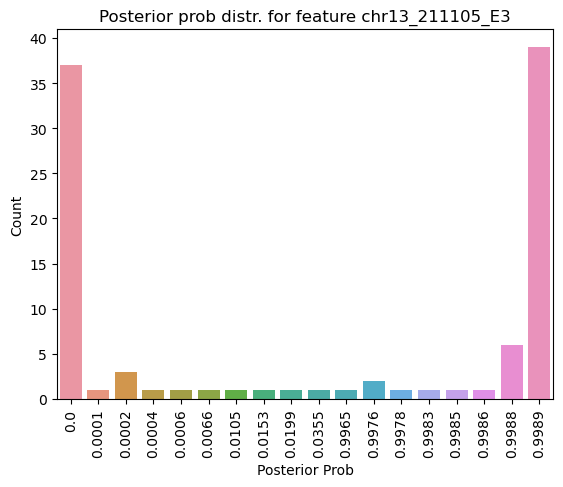

In [51]:
post_list = df['chr13_211105_E3'].tolist()
ax = sns.countplot(x = post_list)
ax.set(title='Posterior prob distr. for feature chr13_211105_E3', xlabel= "Posterior Prob", ylabel="Count")
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

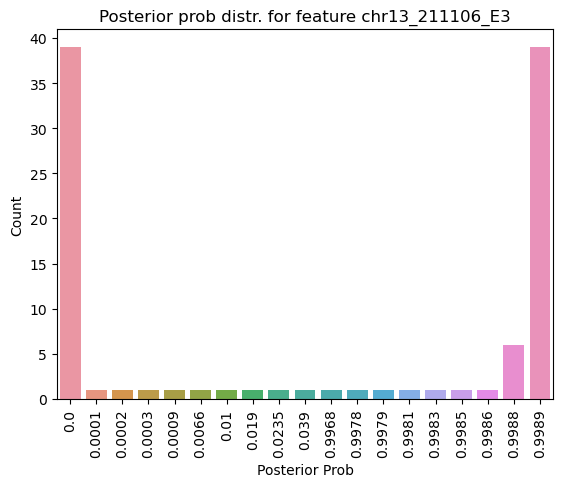

In [52]:
post_list = df['chr13_211106_E3'].tolist()
ax = sns.countplot(x = post_list)
ax.set(title='Posterior prob distr. for feature chr13_211106_E3', xlabel= "Posterior Prob", ylabel="Count")
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [54]:
df2 = pd.read_csv("../blueprint_data/processed_data/only_gene_bodies_flattened_partitioned/chr7_0.tsv", sep = '\t')
#df2 = df.set_index('Unnamed: 0')

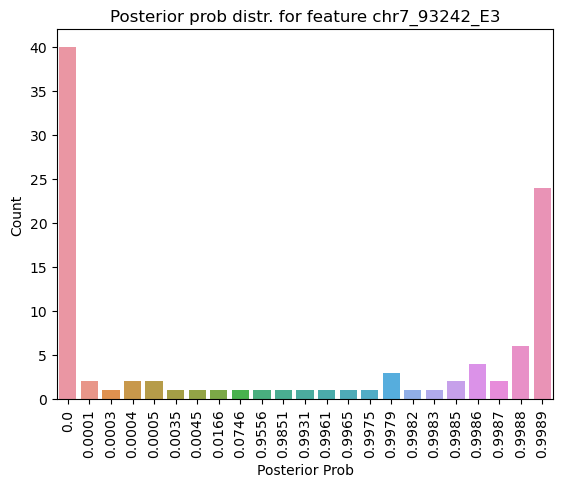

In [55]:
post_list = df2['chr7_93242_E3'].tolist()
ax = sns.countplot(x = post_list)
ax.set(title='Posterior prob distr. for feature chr7_93242_E3', xlabel= "Posterior Prob", ylabel="Count")
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [56]:
df3 = pd.read_csv("../blueprint_data/processed_data/only_gene_bodies_flattened_partitioned/chr2_2.tsv", sep = '\t')

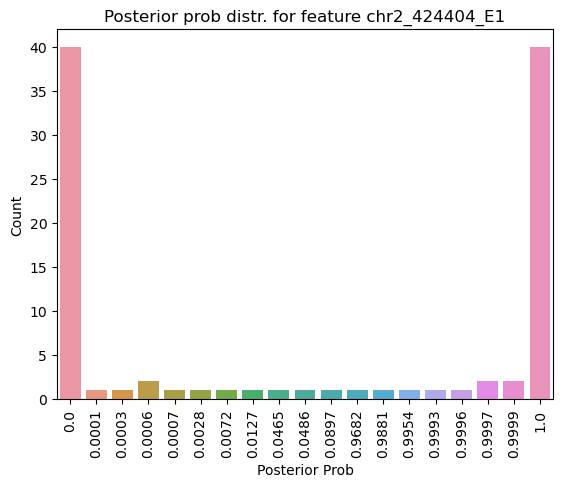

In [57]:
post_list = df3['chr2_424404_E1'].tolist()
ax = sns.countplot(x = post_list)
ax.set(title='Posterior prob distr. for feature chr2_424404_E1', xlabel= "Posterior Prob", ylabel="Count")
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()